# Oscilaciones

En el desarrolo del siguiente trabajo se busca dar un representación grafica del comportamiento oscilatorio de un oscilador libre, amortiguado y forzado (En resonacia).

## Oscilaciones libres.

Este tipo de oscilaciones se dan cuando, dado el desplzamiento x de una particula respecto a su posición de equilibrio, existe una fuerza proporcional al desplazamiento x de sentido contrario a éste como en la siguiente figura.




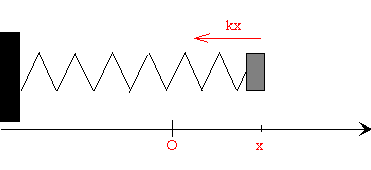

In [1]:
from IPython.display import Image

Image("/content/Oscila_1.jpg")

Para obtener las ecuaciones que rigen este movimiento se hará uso de la segunda ley de Newton.

$\sum \vec{F}_x = -kx = ma$

$-kx = ma$

$ma +kx=0$

$m\dfrac{d^2 x}{dt^2}=-kx$

$\dfrac{d^2 x}{dt^2}=-\dfrac{k}{m}x$

La anterior es la ecuación diferencial que describe este movimiento, para resolverla la convertiremos en un sistema de ecuaciones difereciales.

1) $\dfrac{dx}{dt} = v$

2) $\dfrac{dv}{dt}=-\dfrac{k}{m}x$

Para este caso usaremos las siguientes condicones:

$k = 3$

$m = 1$


In [2]:
# Bibliotecas.
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

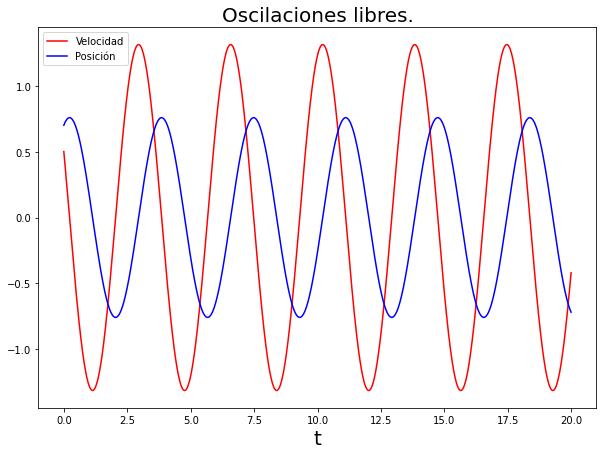

In [3]:

#Definir la función para un osciliador libre.
def simple(x,t,params):
  #x[0] -> x
  #x[1] -> v
  k = params[0]
  m = params[1]
  dxdt = x[1]
  dvdt = (-k / m)*x[0]
  return [dxdt,dvdt]

# Resolver usando odeint
paramsL = [3.0,1.0] #[k,m]
t = np.arange(0,20,0.01)
CIniciales = [0.7,0.5] #[x,v] Condiciones iniciales.
Sol_libre = odeint(simple,CIniciales,t,args=(paramsL,))

# Graficas.
plt.figure(figsize=(10, 7))
plt.plot(t,Sol_libre[:,1],"r", label='Velocidad')
plt.plot(t,Sol_libre[:,0],"b", label='Posición')
plt.title('Oscilaciones libres.',size=20)
plt.xlabel("t",size=20)
plt.legend()
plt.show()

En este caso se tiene como resultado que tanto la velocidad como la posición oscilan de forma armónica.

## Oscilaciones amortiguadas.

En este caso debemos considerar el oscilador libre anteriormente mostrado, pero agregando un término a la ecuación $F_r = -\lambda v$, el ecual es generado por la fricción y es opuesto a la velocidad, quedando así la siguiente ecuación:



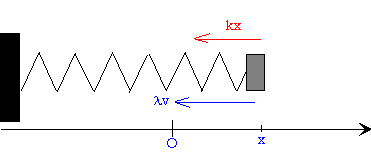

In [4]:
Image("/content/Oscila_2.jpg")

$\sum \vec{F}_x = -kx -\lambda v = ma$

$ma = -kx -\lambda v$

$m\ddot x = -kx -\lambda\dot x$

$m\ddot x +kx +\lambda\dot x = 0$

$\ddot x +\dfrac{k}{m}x +\dfrac{\lambda}{m}\dot x = 0$


Para solucionar la ecuación se debe convertir en un sistema de ecuaciones diferenciales.

1) $\dfrac{dx}{dt} = v$

2) $\dfrac{dv}{dt}=-\dfrac{k}{m}x -\dfrac{\lambda}{m}v $

Y usaremos las siguiente condicones: 

$k = 3$

$m = 1$

$\lambda = 1$

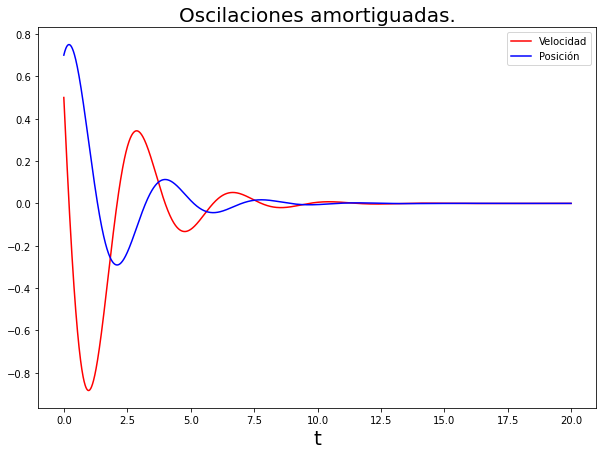

In [5]:
#Definir la función para un osciliador amortiguado.
def amortiguado(x,t,params):
  #x[0] -> x
  #x[1] -> v
  k = params[0]
  m = params[1]
  B = params[2]
  dxdt = x[1]
  dvdt = -((k / m)*x[0])-((B / m)*x[1])
  return [dxdt,dvdt]

# Resolver usando odeint
paramsA = [3.0,1.0,1.0] #[k,m,lambda]
Sol_amortiguado = odeint(amortiguado,CIniciales,t,args=(paramsA,))  


# Graficas.
plt.figure(figsize=(10, 7))
plt.plot(t,Sol_amortiguado[:,1],"r", label='Velocidad')
plt.plot(t,Sol_amortiguado[:,0],"b", label='Posición')
plt.title("Oscilaciones amortiguadas.",size=20)
plt.xlabel("t",size=20)
plt.legend()
plt.show()

En este caso podemos como despues de varias oscilaciones la posición tiende a 0, es decir a la posición de equilibrio y la velocidad a 0, en este caso consideramos $\lambda = 1$, más sin embargo si consideramos un $\lambda = 10$, es decir más grande(fuertemente amortiguado) se puede ver como este comportamiento se da sin oscilaciones.

$k = 3$

$m = 1$

$\lambda = 7$

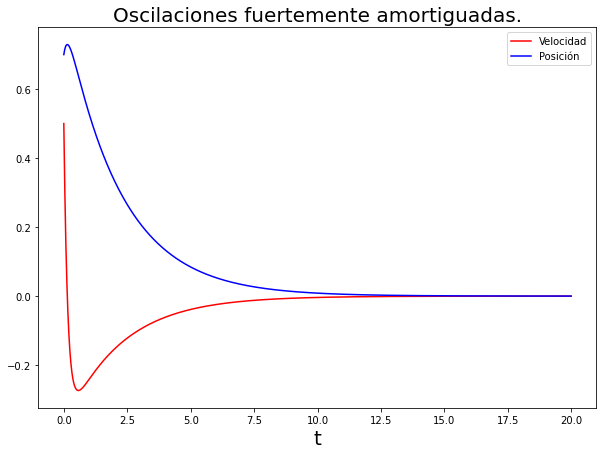

In [6]:
# Resolver usando odeint (amortiguamiento menor)
paramsAF = [3.0,1.0,7.0] #[k,m,lambda]
Sol_amortiguadoF = odeint(amortiguado,CIniciales,t,args=(paramsAF,))  


# Graficas.
plt.figure(figsize=(10, 7))
plt.plot(t,Sol_amortiguadoF[:,1],"r", label='Velocidad')
plt.plot(t,Sol_amortiguadoF[:,0],"b", label='Posición')
plt.title("Oscilaciones fuertemente amortiguadas.",size=20)
plt.xlabel("t",size=20)
plt.legend()
plt.show()

## Oscilaciones forzadas.

En este último caso tendremos las mismas fuerzas que actúan en las oscilaciones amortiguadas, pero esta vez se tendrá una fuerza oscilante que permitirá oscilar el sistema tal que así:



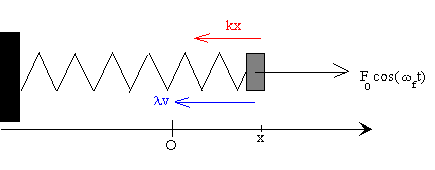

In [7]:
Image("/content/Oscila_3.jpg")

$\sum \vec{F}_x = -kx -\lambda v + F_0\cos(\omega_f t) = ma, \omega_f: frecuencia$

$ma = -kx -\lambda v + F_0\cos(\omega_f t) $


$m\ddot x = -kx -\lambda\dot x + F_0\cos(\omega_f t)$


$m\ddot x +kx +\lambda\dot x - F_0\cos(\omega_f t) = 0$


$\ddot x +\dfrac{k}{m}x +\dfrac{\lambda}{m}\dot x - \dfrac{F_0
}{m}\cos(\omega_f t) = 0$


Sistema de ecuaciones diferenciales:

1) $\dfrac{dx}{dt} = v$

2) $\dfrac{dv}{dt}=-\dfrac{k}{m}x -\dfrac{\lambda}{m}v + \dfrac{F_0
}{m}\cos(\omega_f t)$

Condicones: 

$k = 3$

$m = 1$

$\lambda = 1$

$F_0 = 0.5$

$\omega_f = \sqrt{\frac{k}{m}}$ Frecuencia propia.

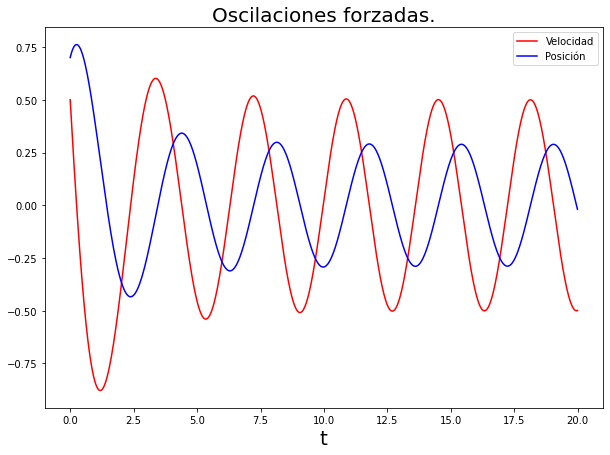

In [8]:
#Definir la función para un osciliador forzado.
def amortiguado(x,t,params):
  #x[0] -> x
  #x[1] -> v
  k = params[0]
  m = params[1]
  B = params[2]
  F = params[3]
  w = params[4]
  dxdt = x[1]
  dvdt = -((k / m)*x[0])-((B / m)*x[1]) + ((F/m)*np.cos(w*t))
  return [dxdt,dvdt]



# Resolver usando odeint (forzado)
paramsF = [3.0,1.0,1.0,0.50,np.sqrt(3.0/1)] #[k,m,lambda,F,omega]
Sol_forzado = odeint(amortiguado,CIniciales,t,args=(paramsF,))  


# Graficas.
plt.figure(figsize=(10, 7))
plt.plot(t,Sol_forzado[:,1],"r", label='Velocidad')
plt.plot(t,Sol_forzado[:,0],"b", label='Posición')
plt.title("Oscilaciones forzadas.",size=20)
plt.xlabel("t",size=20)
plt.legend()
plt.show()

En este caso vemos como la fuerza $F_0$ fuerza al sistema a oscilar, pero que pasa si tenemos un amorguamiento muy fuerte.

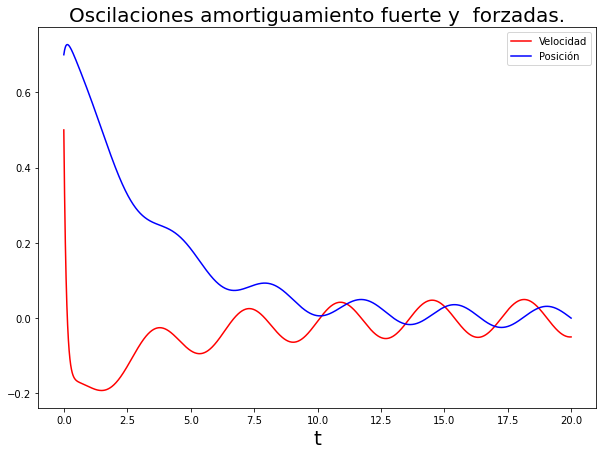

In [9]:
# Resolver usando odeint (amortiguado fuerte y forzado)
paramsAFF = [3.0,1.0,10.0,0.50,np.sqrt(3.0/1)] #[k,m,lambda,F,omega]
Sol_forzado_AF = odeint(amortiguado,CIniciales,t,args=(paramsAFF,))  


# Graficas.
plt.figure(figsize=(10, 7))
plt.plot(t,Sol_forzado_AF[:,1],"r", label='Velocidad')
plt.plot(t,Sol_forzado_AF[:,0],"b", label='Posición')
plt.title("Oscilaciones amortiguamiento fuerte y  forzadas.",size=20)
plt.xlabel("t",size=20)
plt.legend()
plt.show()

Ahora, compararemos la velocidad y la posición de todos los casos vistos. 

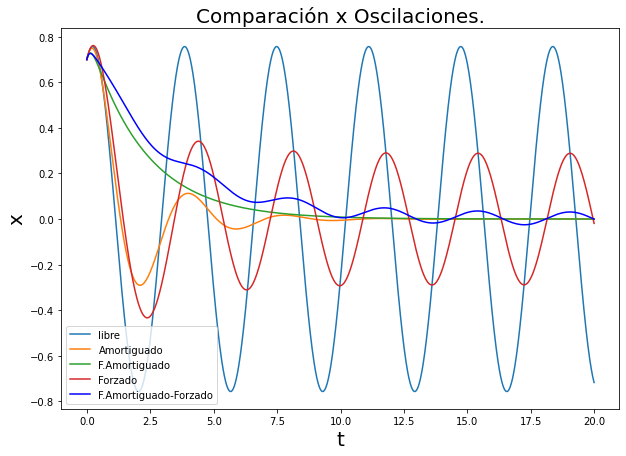

In [10]:
# Graficas.
plt.figure(figsize=(10, 7))
plt.plot(t,Sol_libre[:,0], label='libre')
plt.plot(t,Sol_amortiguado[:,0], label='Amortiguado')
plt.plot(t,Sol_amortiguadoF[:,0], label='F.Amortiguado')
plt.plot(t,Sol_forzado[:,0], label='Forzado')
plt.plot(t,Sol_forzado_AF[:,0],"b", label='F.Amortiguado-Forzado')
plt.title('Comparación x Oscilaciones.',size=20)
plt.xlabel("t",size=20)
plt.ylabel("x",size=20)
plt.legend()
plt.show()

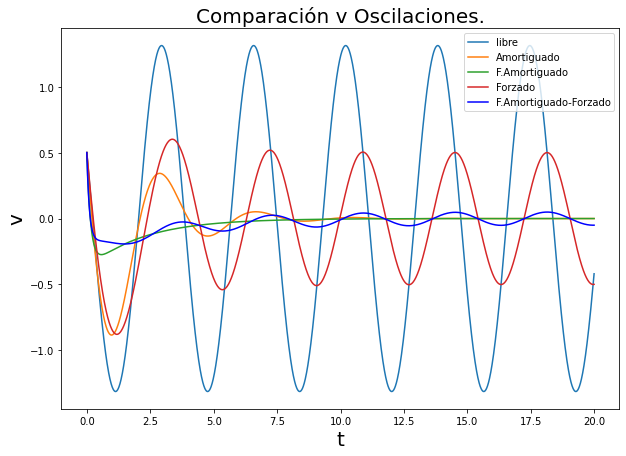

In [11]:
# Graficas.
plt.figure(figsize=(10, 7))
plt.plot(t,Sol_libre[:,1], label='libre')
plt.plot(t,Sol_amortiguado[:,1], label='Amortiguado')
plt.plot(t,Sol_amortiguadoF[:,1], label='F.Amortiguado')
plt.plot(t,Sol_forzado[:,1], label='Forzado')
plt.plot(t,Sol_forzado_AF[:,1],"b", label='F.Amortiguado-Forzado')
plt.title('Comparación v Oscilaciones.',size=20)
plt.xlabel("t",size=20)
plt.ylabel("v",size=20)
plt.legend()
plt.show()